In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'disaster-images-dataset-cnn-model:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F512329%2F945028%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240809%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240809T201507Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D598e52ad6faba319ec44c647f786e1e9924d3158247dc37a106b2a71d9d88ef95ece2c0e681fad525e8a2e0653e95ca2337e9b0608e89e82fa56e0c8286573cc83d5acea11f359dd17451071dd2059ad4773a0552adb9c7f1e5cfa5a44ff0733f1ee1c8c065653410baa378e22666fc91e4e639b98c41dbad33f937c5e545d638775faf15c299a74da0cb3fd5ad2a4946391cae0b65a61d8564eec4e9298230cc34ac5a6e584ad3bf6807e61b8a0084c27b266a4a9b3bc17c92ab3243d6ff76d8c6c25d243e201144fb97171ed7f8fced82c3c9a6f83b828ea89770fdf855ed0dbcf7b78d6fcda76c85deb65e700e874f5a4ef21f2b33fd8ddfc67b160799448'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disaster-images-dataset-cnn-model/best_model.h5
/kaggle/input/disaster-images-dataset-cnn-model/history
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/readme.txt
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/623.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/764.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/771.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/208.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/820.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset/Flood/473.jpg
/kaggle/input/disaster-images-dataset-cnn-model/DisasterMod

# Steps:
* upload datasets'
* apply the subdirectories(Train, Validation,Test) on model dir. after that join the three paths to the bas dictonary path using  **os.path.join**  .
* again apply all the subdirectories on cyclone, earthquake, flood, wildfire saperately.



# Upload Datasets

In [ ]:
import os
import shutil


model_dir='/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel'


cyclone='/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Cyclone'
earthquake='/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Earthquake'
flood='/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Flood'
wildfire='/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/Wildfire'



In [ ]:
len(model_dir)

61

In [ ]:
len(cyclone)

69

In [ ]:
len(earthquake)

72

In [ ]:
len(flood)

67

In [ ]:
len(wildfire)

70

The **model_dir** data is organized into three parts: train, validation, and test. These parts are essential for different stages of model development:

* **Training Data (train)**: Used to train the model.
* **Validation Data (validation)**: Used to tune the model parameters and validate the training process.
* **Test Data (test)**: Used to evaluate the model's performance after training.


The **os.path.join function** is used to create the full paths to these subdirectories by joining the base directory (model_dir) with the names of the subdirectories (train, validation, test). This function ensures that the paths are constructed correctly according to the operating system's file system conventions.

the **variable create_dirs** is a boolean flag that indicates whether the directories should be created if they do not already exist. Here's a detailed explanation of what it means:

**create_dirs = False:** When this flag is set to False, **the code will check if the directories exist but will not create them if they do not exist.** This is useful if you want to ensure the directories are already present and avoid making any changes to the file system.

**create_dirs = True:** When this flag is set to True, the **code will create the directories if they do not already exist**. This is useful if you want to automatically set up the required directory structure without manually creating each directory.


**When create_dirs is set to False**, the code will only check for the existence of directories but will not attempt to create them. **If any of the directories do not exist, you will see print statements indicating which directories are missing.**

In [ ]:
train_dir=os.path.join(model_dir, 'train')
validation_dir=os.path.join(model_dir, 'validation')
test_dir=os.path.join(model_dir, 'test')


train_c=os.path.join(train_dir, 'cyclone')
train_e=os.path.join(train_dir, 'earthquake')
train_f=os.path.join(train_dir, 'flood')
train_w=os.path.join(train_dir, 'wildfire')

validation_c=os.path.join(validation_dir, 'cyclone')
validation_e=os.path.join(validation_dir, 'earthquake')
validation_f=os.path.join(validation_dir, 'flood')
validation_w=os.path.join(validation_dir, 'wildfire')

test_c=os.path.join(test_dir, 'cyclone')
test_e=os.path.join(test_dir, 'earthquake')
test_f=os.path.join(test_dir, 'flood')
test_w=os.path.join(test_dir, 'wildfire')


create_dirs=True


# Print the directories to verify the paths
print(train_dir)
print(validation_dir)
print(test_dir)
print(train_c)
print(train_e)
print(train_f)
print(train_w)
print(validation_c)
print(validation_e)
print(validation_f)
print(validation_w)
print(test_c)
print(test_e)
print(test_f)
print(test_w)


/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/test
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train/cyclone
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train/earthquake
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train/flood
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train/wildfire
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation/cyclone
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation/earthquake
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation/flood
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation/wildfire
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/test/cyclone
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/test/earthquake
/kaggle

**To check whether the directories already exist, you can use the os.path.exists function. This function returns True if the specified path exists and False otherwise**

In [ ]:
train_dir = os.path.join(model_dir, 'train')
validation_dir = os.path.join(model_dir, 'validation')
test_dir = os.path.join(model_dir, 'test')

create_dir=False

if not os.path.exists(train_dir):
    print('train_dir does not exist')

if not os.path.exists(validation_dir):
    print('validation dir doest not exists')

if not os.path.exists(test_dir):
    print('test_dir does not exists')



**If Directories do not exist . we should create directories.**

In [ ]:
if create_dir:
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(validation_dir, exist_ok=True)
    os.makedirs(test, exist_ok=True)



print(train_dir)
print(validation_dir)
print(test_dir)
print(train_c)
print(train_e)
print(train_f)
print(train_w)
print(validation_c)
print(validation_e)
print(validation_f)
print(validation_w)
print(test_c)
print(test_e)
print(test_f)
print(test_w)


/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/test
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train/cyclone
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train/earthquake
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train/flood
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/train/wildfire
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation/cyclone
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation/earthquake
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation/flood
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/validation/wildfire
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/test/cyclone
/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/test/earthquake
/kaggle

# TRAIN THE IMAGES

# Explanation:
**if copy_images:**
copies a set of images from different source directories (representing different natural disasters like cyclones, earthquakes, floods, and wildfires)

        **names = ['{}.jpg'.format(i) for i in range(400)]**
        
* This line creates a list named names containing 400 strings, each representing a file name (e.g., 0.jpg, 1.jpg, ..., 399.jpg)

       ** for name in names:**
        
        
*  A loop is initiated that will iterate over each file name in the names list.
  
           ** source = os.path.join(cyclone, name)**
           
                  
* For each file name, this line constructs the full path of the source file by joining the directory path stored in cyclone_dir with the current name from the loop.
* **cyclone:** This is a variable that holds the path to a directory where cyclone-related images are stored.
* **os.path.join(cyclone_dir, name)**: This function combines (or "joins") the directory path cyclone_dir with the file name name
* If the image file with that name (0.jpg) actually exists in the cyclone_dir, then the source variable will correctly point to this existing image file.
* If the file does not exist in cyclone_dir, the source variable will point to a path that doesn't correspond to any actual file, leading to an error when the script tries to copy it.




            **destination = os.path.join(train_dir_c, name)**
            
* This line constructs the full path of the destination file by joining the directory path stored in train_dir_c (the training directory for cyclone images) with the current name.
* This is where the image file will be copied to.

           ** shutil.copyfile(source, destination)**
           
* The shutil.copyfile function copies the file from the source path to the destination path.            

        
After this, same loop is applied for the next directory 'earthquake', 'flood','wildfires'.

If an earthquake image (let's say 100.jpg) is mistakenly placed in the cyclone_dir, the code will still try to copy that image from the cyclone directory to the cyclone training directory (train_dir_c). The code doesn’t check whether the image is actually a cyclone image or an earthquake image—it only checks if a file with that name exists in the directory.


If the code tries to copy 100.jpg and this file does not exist in cyclone, a FileNotFoundError will occur, and the script will stop unless there's error handling.

The script then moves to the next loop, which tries to copy images from earthquake to trai_e.
If 100.jpg exists in earthquake_dir, it will be successfully copied to train_e.

In [ ]:
copy_images=False #if images are already copied,
if copy_images:
    #Train
    names=['{}.jpg'.format(i) for i in range(50)]
    for name in names:
        source=os.path.join(cyclone, name)
        destination=os.path.join(train_c, name)
        shutil.copyfile(source, destination)

    names=['{}.jpg'.format(i) for i in range(50)]
    for name in names:
        source=os.path.join(earthquake, name)
        destination=os.path.join(tain_e, name)
        shutil.copyfile(source, destination)

    names=['{}.jpg'.format(i) for i in range(50)]
    for name in names:
        source=os.path.join(flood, name)
        destination=os.path.join(tain_f, name)
        shutil.copyfile(source, destination)

        names=['{}.jpg'.format(i) for i in range(50)]
    for name in names:
        source=os.path.join(wildfire, name)
        destination=os.path.join(tain_w, name)
        shutil.copyfile(source, destination)

# VALIDATION

In [ ]:
copy_images=False #if images are already copied,
if copy_images:
    names=['{}.jpg'.format(i) for i in range(10, 50)]
    for name in names:
        source=os.path.join(cyclone, name)
        destination=os.path.join(validation_c, name)
        shutil.copyfile(source, destination)

    names=['{}.jpg'.format(i) for i in range(10, 50)]
    for name in names:
        source=os.path.join(earthquake, name)
        destination=os.path.join(validation_e, name)
        shutil.copyfile(source, destination)


    names=['{}.jpg'.format(i) for i in range(10, 50)]
    for name in names:
        source=os.path.join(flood, name)
        destination=os.path.join(validation_f, name)
        shutil.copyfile(source, destination)

    names=['{}.jpg'.format(i) for i in range(10, 50)]
    for name in names:
        source=os.path.join(wildfire, name)
        destination=os.path.join(validation_w, name)
        shutil.copyfile(source, destination)



In [ ]:
copy_images=False #if images are already copied,
if copy_images:

    names = ['{}.jpg'.format(i) for i in range(10, 50)]
    for name in names:
        source = os.path.join(cyclone, name)
        destination = os.path.join(test_c, name)
        shutil.copyfile(source, destination)
    names = ['{}.jpg'.format(i) for i in range(10, 50)]
    for name in names:
        source = os.path.join(earthquake, name)
        destination = os.path.join(test_e, name)
        shutil.copyfile(source, destination)
    names = ['{}.jpg'.format(i) for i in range(10, 50)]
    for name in names:
        source = os.path.join(flood, name)
        destination = os.path.join(test_f, name)
        shutil.copyfile(source, destination)
    names = ['{}.jpg'.format(i) for i in range(10, 50)]
    for name in names:
        source = os.path.join(wildfire, name)
        destination = os.path.join(test_w, name)
        shutil.copyfile(source, destination)

# Steps:

* set the path to the main directory
* function to load and preprocess images from subdirectories
* load the images
* function to visualize random images
* visualize up to 5 random images
* display information about the images

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random


* The main directory is the directory that directly contains the subdirectories.
* **Subdirectories:** Cyclone/, Earthquake/, Flood/
* When you pass the path to the main directory (/kaggle/input/disaster-images-dataset-cnn-model/) to the load_images_from_subdirs function, the function will look inside this main directory and process the images in each of its subdirectories (Cyclone/, Earthquake/, Flood/).

**images = []**

Inside the function, an empty list named images is initialized. This list will eventually hold the image data that is loaded from the subdirectories.

**labels** = []

Another empty list named labels is initialized. This list will store the labels or categories associated with each image, typically corresponding to the name of the subdirectory from which the image is loaded.

**valid_extensions = ('.png', '.jpg', '.jpeg', '.tif', '.tiff')**

A tuple named valid_extensions is created, containing common image file extensions. This tuple will be used to filter and process only those files with these extensions, ensuring that the function only attempts to load valid image files.

**for subdir in ['train', 'validation', 'test']:**

* This line starts a loop that iterates over a list of subdirectory names: train, validation, and test. During each iteration, the variable subdir will take on the value of one of the

**subdir_path = os.path.join(main_directory, subdir)**

* This line constructs the full path to the current subdirectory by joining the main_directory path with the subdir name. The resulting subdir_path is the complete path to that subdirectory within the main directory.
* Example: If main_directory is /data, and subdir is train, subdir_path will be /data/train.

**if not os.path.exists(subdir_path):**

* This line checks if the subdirectory at subdir_path exists. The os.path.exists function returns True if the path exists and False if it does not.

print(f"Subdirectory does not exist: {subdir_path}")

* If the subdirectory does not exist (i.e., os.path.exists(subdir_path) returns False), this line prints a message indicating that the subdirectory is missing. The path to the missing subdirectory is included in the message.

**continue**

* The continue statement causes the loop to skip the remaining code for the current iteration and move on to the next iteration. In this case, if a subdirectory does not exist, the loop will skip any further processing for that subdirectory and move on to check the next one.


**for category in os.listdir(subdir_path):**

* This line begins a loop that iterates over all items (files and directories) inside the current subdir_path (which could be train, validation, or test). **The os.listdir(subdir_path)** function returns a list of the names of all the items within subdir_path.

**Categories could represent different classes or types of images (e.g., Cyclone, Earthquake, etc.).**


**category_path = os.path.join(subdir_path, category)**

* This line constructs the full path to the current category by joining the subdir_path with the category name. The resulting category_path is the complete path to that item (which could be a subdirectory representing a category or a file) inside the train, validation, or test subdirectory.

* Example: If subdir_path is /data/train and category is Cyclone, then category_path will be /data/train/Cyclone.


**if not os.path.isdir(category_path):**

* This line checks if the category_path is actually a directory (as opposed to a file). The os.path.isdir function returns True if category_path is a directory and False if it is not.

**continue**

* If category_path is not a directory, the continue statement skips any further processing for this item and moves on to the next item in the loop. This ensures that only directories are processed in the subsequent code, ignoring any files that might also be present in subdir_path.

This code is designed to navigate into each subdirectory (train, validation, test), identify and process only the directories (categories) within them, and skip any files. This is useful for organizing and working with a dataset where images are grouped by category within each subdirectory.

In [ ]:
# set the path to the ,main directory

# Function to load and preprocess images from subdirectories
def load_images_from_subdirs(main_directory):
    images = []
    labels = []
    valid_extensions = ('.png', '.jpg', '.jpeg', '.tif', '.tiff')

    for subdir in ['train', 'validation', 'test']:
        subdir_path = os.path.join(main_directory, subdir)
        if not os.path.exists(subdir_path):
            print(f"Subdirectory does not exist: {subdir_path}")
            continue

        for category in os.listdir(subdir_path):
            category_path = os.path.join(subdir_path, category)
            if not os.path.isdir(category_path):
                continue

            for filename in os.listdir(category_path):
                if filename.lower().endswith(valid_extensions):
                    img_path = os.path.join(category_path, filename)
                    try:
                        img = Image.open(img_path)
                        img = img.convert('RGB')
                        img = img.resize((224, 224))
                        img_array = np.array(img)
                        images.append(img_array)
                        labels.append(category)
                    except Exception as e:
                        print(f"Error loading image {filename}: {str(e)}")
    return np.array(images), labels


main_directory='/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel'

images, labels=load_images_from_subdirs(main_directory)

# This is the explanation of the last method of above code:

This code snippet processes image files in each category directory. It checks if each file has a valid image extension, opens and preprocesses the image, converts it to RGB format, resizes it to 224x224 pixels, and appends the resulting image array and the category label to their respective lists. If an error occurs while loading an image, it prints an error message. Finally, it returns the list of image arrays and their labels as NumPy arrays.



**for filename in os.listdir(category_path):**

This line starts a loop that iterates over each file in the current category_path. Here, category_path is the path to a directory representing a specific category (e.g., Cyclone, Earthquake, flood, and wildfire).

**if filename.lower().endswith(valid_extensions):**

This line checks if the current filename has a valid image file extension (e.g., .png, .jpg, .jpeg). The .lower() method ensures the check is case-insensitive. Only files with these extensions are processed.

filename is the name of the image file (including its extension) within a given directory, and the "image file" is the actual file on the disk that contains the image data. The code snippet checks if filename ends with a valid image extension and then constructs the full path to that image file.


**img_path = os.path.join(category_path, filename)**

This line constructs the full path to the image file by joining category_path and filename. img_path is the path to the specific image file.


**try:**

The try block begins to handle any potential errors that might occur when opening or processing the image.

**img = Image.open(img_path)**

This line opens the image file at img_path using the PIL library and assigns it to the variable img.


**img = img.convert('RGB')**

This line converts the image to RGB color mode, ensuring that the image has three color channels (Red, Green, Blue).

**img = img.resize((224, 224))**

This line resizes the image to a fixed size of 224x224 pixels. This is a common size for input to neural networks.

**img_array = np.array(img)**

This line converts the image into a NumPy array. This array represents the image data in a format suitable for further processing or model input.


**images.append(img_array)**

This line appends the processed image array to the images list, which will contain all the image data.

**labels.append(category)**

This line appends the category label (the name of the current category directory) to the labels list, associating the image with its category.


**except Exception as e:**

This line catches any exceptions that occur during the image processing and assigns the exception to the variable e.

**print(f"Error loading image {filename}: {str(e)}")**

If an error occurs, this line prints an error message that includes the filename and the error details, helping with debugging.

**return np.array(images), labels**

**Finally, this line returns two values: **

images as a NumPy array and labels as a list. This provides the processed image data and their corresponding labels for further use

**Summary:**

The code processes image files in each category directory by validating, opening, resizing, and converting them into NumPy arrays. It also handles any errors that occur during this process and returns the image data and labels.

In [ ]:
#load the images
images, labels=load_images_from_subdirs(model_dir)

print(f"total images loaded:{len(images)}")
print(f"unique categories:{set(labels)}")


total images loaded:2400
unique categories:{'flood', 'earthquake', 'wildfire', 'cyclone'}



**images, labels = load_images_from_subdirs(model_dir)**

* This line loads images from the directory model_dir and assigns them to images. The labels list contains the names of the categories (folders) where each image was found.


**print(f"Total images loaded: {len(images)}")**

* This line counts and prints how many images were loaded.

**print(f"Unique categories: {set(labels)}")**

* This line shows all the unique categories by converting the labels list into a set, which removes duplicates.

In [ ]:
len(labels)

2400

In [ ]:
labels[4]

'flood'

In [ ]:
labels[2000]

'flood'

In [ ]:
labels[1000]

'wildfire'

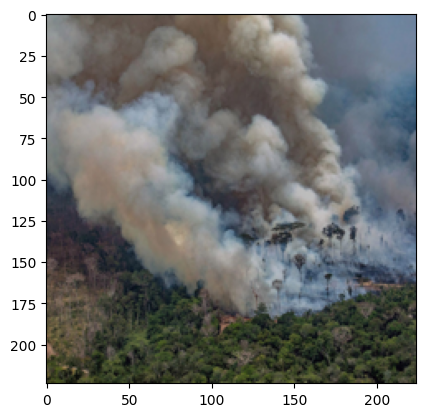

In [ ]:
#function to visualize the ramdon images
plt.imshow(images[1000])


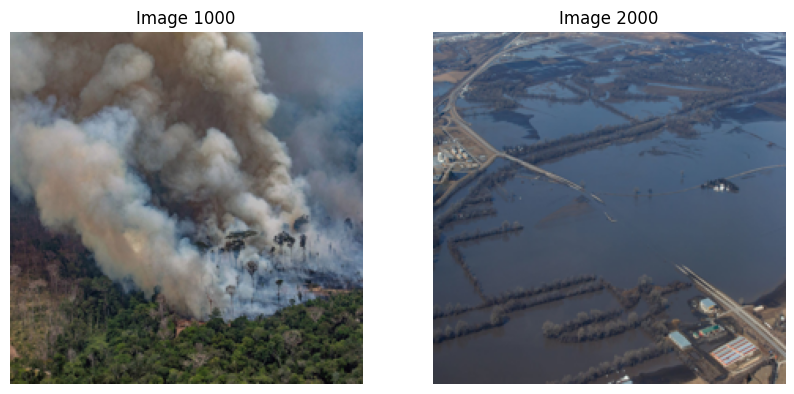

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'images' is a list or array of images
# Displaying the images at index 1000 and 1001

plt.figure(figsize=(10, 5))

# First image (index 1000)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(images[1000])
plt.title("Image 1000")
plt.axis('off')

# Second image (index 2000)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(images[2000])
plt.title("Image 2000")
plt.axis('off')

# Display both images
plt.show()


# I have selected last 10 images from the dataset,

* apply filtered , pooling and then compared the images after, and before pooling

* images[-10:] extracts the last 10 images from the images array.
*  **images:** This is a NumPy array containing 2400 images, each with dimensions 32x32 pixels and 3 color channels (RGB).
* **last_10_images:** The selected 10 images are then stored in the variable last_10_images. This new array has a shape of (10, 32, 32, 3) because it contains 10 images, each with the same original dimensions.
* **cv2** is a Python library that provides functions for computer vision tasks. It is part of OpenCV (Open Source Computer Vision Library), widely used for image and video processing.
* Initializes an empty list **filtered_images** to store the processed images.
* **gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)**: Converts the current image img from RGB to grayscale using **cv2.cvtColor**. **cv2.COLOR_RGB2GRAY** specifies the conversion from RGB to grayscale.

* **sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)**
Applies the Sobel filter to the grayscale image gray to detect edges along the x-axis.
**cv2.CV_64F** indicates the data type for the output image.
The parameters **1, 0** specify the order of the derivative for the x-axis and y-axis, respectively.
**ksize=5** sets the size of the **Sobel kernel**.

* **sobel_combined = cv2.magnitude(sobelx, sobely)**:
This gives the overall edge intensity in both directions.



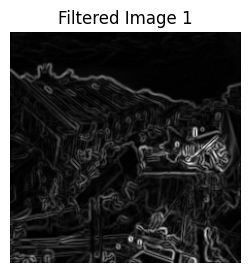

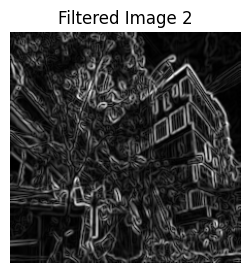

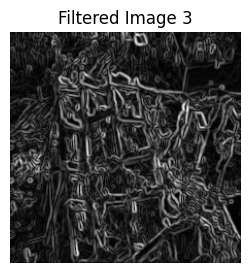

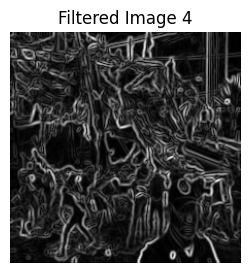

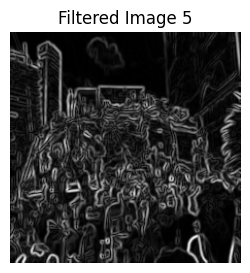

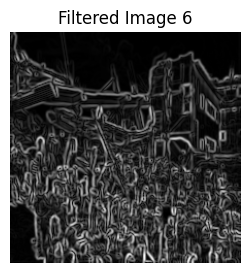

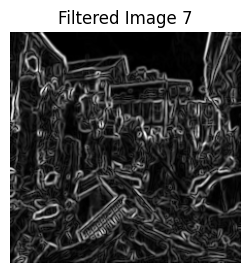

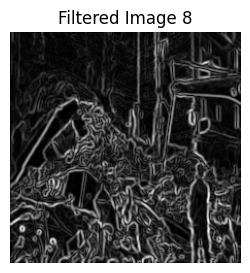

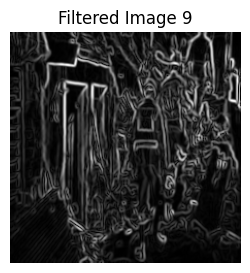

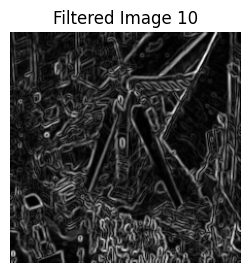

In [ ]:
import numpy as np

# Assuming 'images' is a NumPy array with shape (2400, 32, 32, 3)
last_10_images = images[-10:]


import cv2
import matplotlib.pyplot as plt
%matplotlib inline


# Apply a Sobel filter for edge detection
filtered_images = []
for img in last_10_images:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Sobel filter on x-axis
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Sobel filter on y-axis
    sobel_combined = cv2.magnitude(sobelx, sobely)  # Combine both filters
    filtered_images.append(sobel_combined)




# Display the filtered images
for i, filtered_img in enumerate(filtered_images):
    plt.figure(figsize=(3, 3))
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Filtered Image {i+1}')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

    #i is the index of the current image in the loop
    #(starting from 0), so i+1 adjusts it to start from 1.
    #The f before the string indicates an f-string,
    #which allows for embedding expressions inside curly braces {}
    #to include variables or expressions directly in the string.


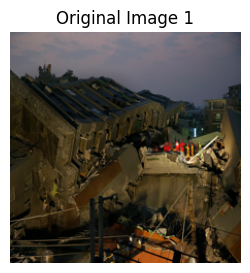

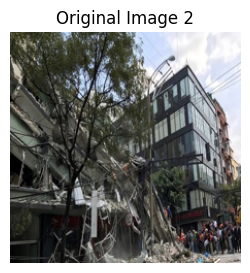

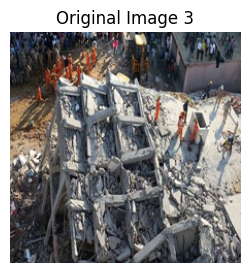

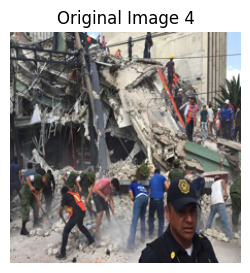

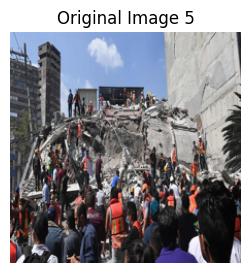

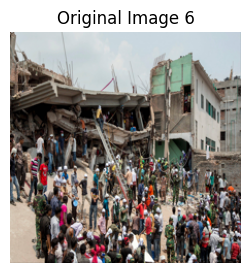

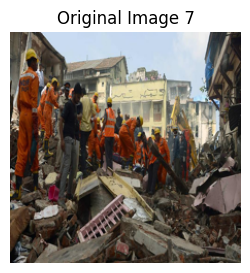

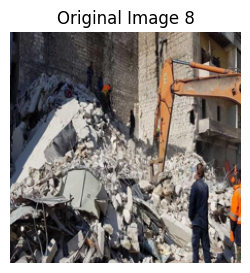

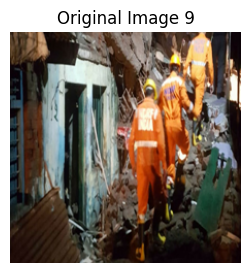

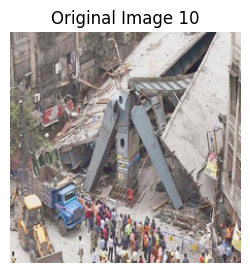

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'images' is a NumPy array with shape (2400, 32, 32, 3)
last_10_images = images[-10:]

# Now loop through last_10_images to display them
for i, original_img in enumerate(last_10_images):
    plt.figure(figsize=(3, 3))
    plt.imshow(original_img)  # Use original_img instead of filtered_img
    plt.title(f'Original Image {i+1}')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()


* **pooled_images = []**

Initializes an empty list pooled_images to store the resized images.

* **pooled = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_AREA)**
Resizes the image **img to half its original size**.

**img.shape[1] and img.shape[0]** give the width and height of the image, respectively. **//2 divides the width and height by 2,** effectively reducing the image size by half in both dimensions.  **cv2.INTER_AREA** is the interpolation method used for resizing, which is generally recommended for shrinking images as it provides good quality.





In [ ]:
pooled_images = []
for img in filtered_images:
    pooled = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_AREA)
    pooled_images.append(pooled)


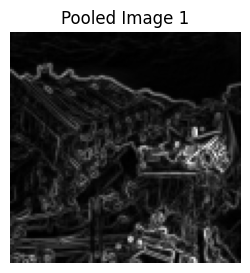

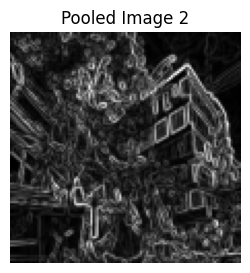

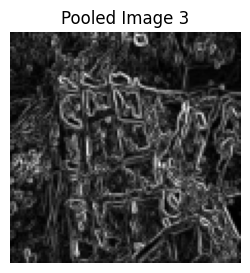

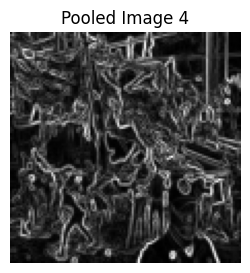

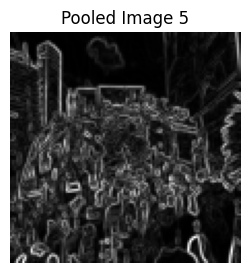

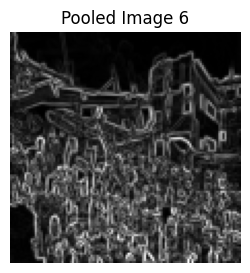

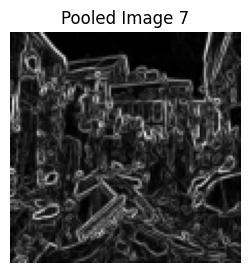

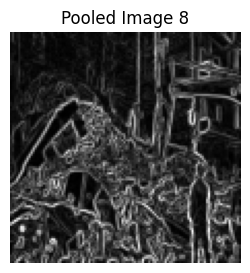

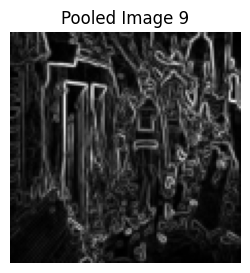

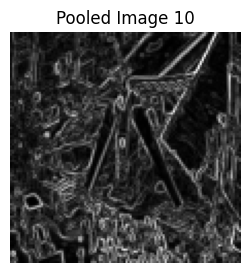

In [ ]:
import matplotlib.pyplot as plt

# Display the pooled images
for i, pooled_img in enumerate(pooled_images):
    plt.figure(figsize=(3, 3))
    plt.imshow(pooled_img, cmap='gray')
    plt.title(f'Pooled Image {i+1}')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()


**1:**

The number of rows in the subplot grid. In this case, there is 1 row.

**3:**

The number of columns in the subplot grid. Here, there are 3 columns.

**1:**  

The index of the current subplot (starting from 1, not 0). This means that this command is placing the plot in the first position of the grid.

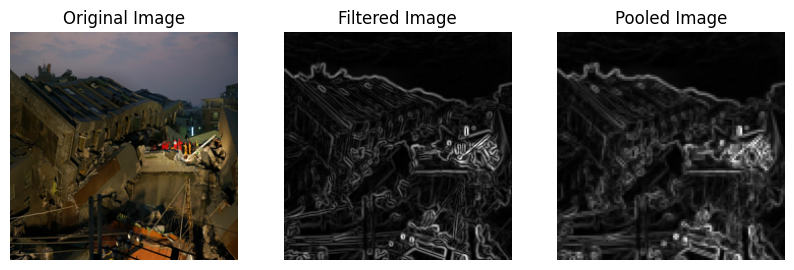

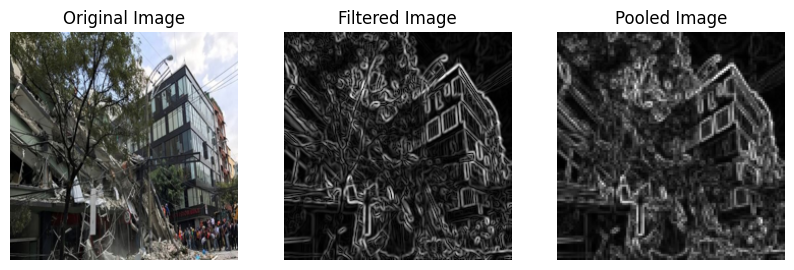

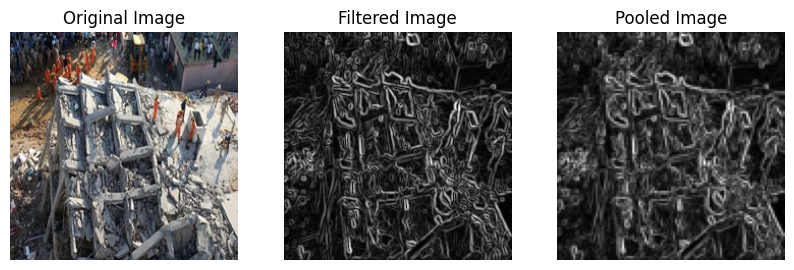

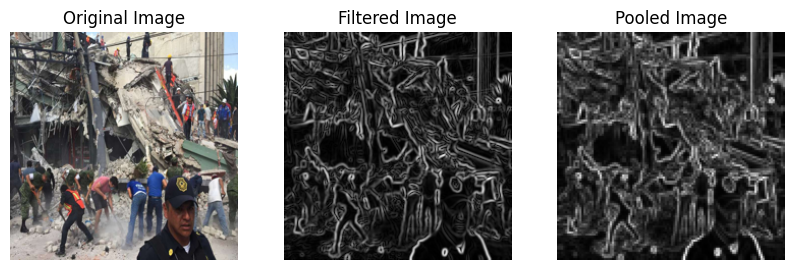

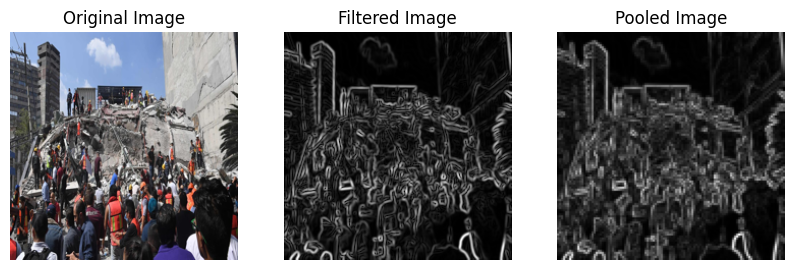

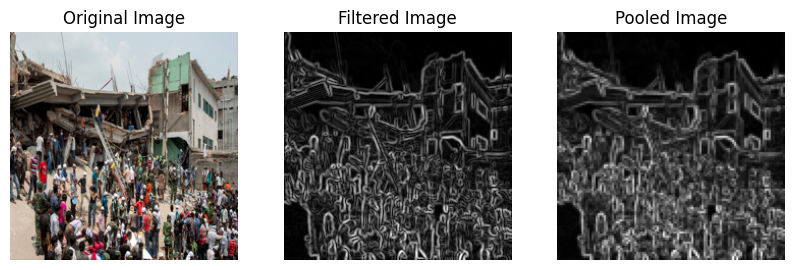

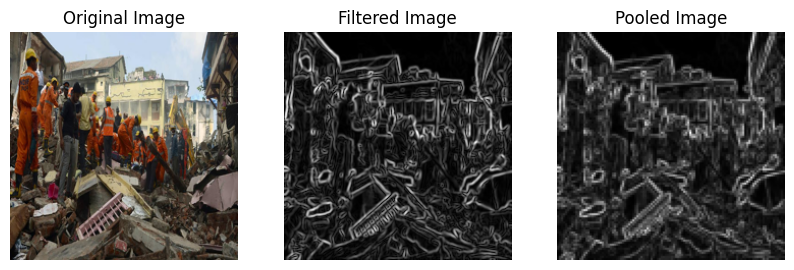

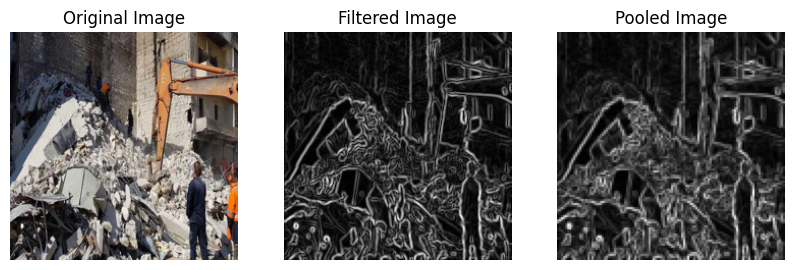

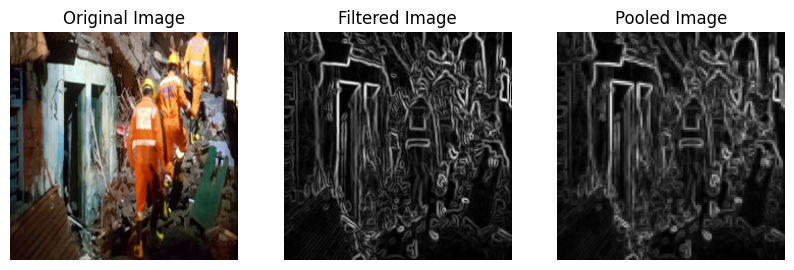

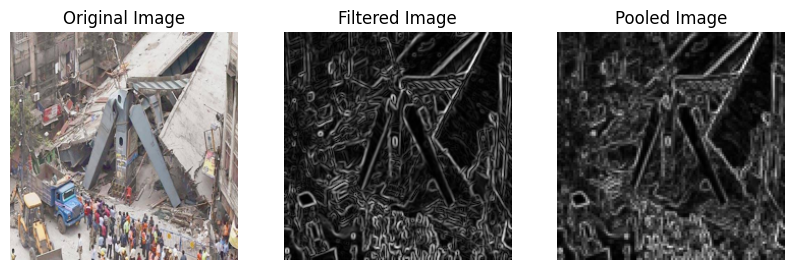

In [ ]:
for i in range(10):
    plt.figure(figsize=(10, 4))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(last_10_images[i])
    plt.title('Original Image')
    plt.axis('Off')

    # Filtered Image
    plt.subplot(1, 3, 2)
    plt.imshow(filtered_images[i], cmap='gray')
    plt.title('Filtered Image')
    plt.axis('Off')


    # Pooled Image
    plt.subplot(1, 3, 3)
    plt.imshow(pooled_images[i], cmap='gray')
    plt.title('Pooled Image')
    plt.axis('Off')


    plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(20, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(40, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(40, (3, 3), activation='relu'))
# Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(40, activation='softmax'))
model.add(layers.Dense(4))
# Display the architecture of our model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 20)     │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 40)     │         7,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 40)       │        14,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │        25,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           164 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,044 (187.67 KB)

 Trainable params: 48,044 (187.67 KB)

 Non-trainable params: 0 (0.00 B)

# To calculate the number of parameters for a Conv2D layer, you need to consider the following components:

* **Kernel Parameters:** Each filter has a size of height x width x input_channels, and each filter has a set of weights and a bias.

* **Bias Parameters**: Each filter has one bias term


# Formula:

* Number of filters: F
* Kernel size: (K_height, K_width)
* Number of input channels: C
* Number of biases: F

# number of parameters=(K height * K width * C+1) F
= (3*3*3+1)*32=896

* Kernel Size: (3, 3)
* Number of Filters: 32
* Number of Input Channels: 3 (since the previous layer output is RGB


# conv2d_11 (Conv2D) │ (None, 4, 4, 128)|73,856

* Kernel Size: (3, 3)
* Kernel Size: (3, 3)
* Number of Filters: 128
* Number of Input Channels: 64
* Calculate the number of parameters per filter:

Parameters per Filter=(3*3*64)+1=576+1=577

* Calculate the total number of parameters:
= 577*128=73,856


**MaxPooling2D has zero parameters** because it only performs a fixed operation of selecting the maximum value from each pooling window (e.g., 2x2) in the input feature map, without involving any learnable weights or biases. It merely reduces the spatial dimensions of the input by summarizing local regions, hence no parameters are adjusted during training.

* **Total params: 159,428** (622.77 KB) The total number of parameters in the model, which includes both weights and biases across all layers.

*  **Trainable params: 159,428** (622.77 KB) All 159,428 parameters are trainable, meaning they can be adjusted during model training.

*  **Non-trainable params: 0** (0.00 B) There are no parameters in the model that are fixed and not updated during training. This usually applies to layers like MaxPooling2D, which don't have trainable parameters